# Project Title: iFood Customer Analysis

# Objectives:

1) Which income groups spend the most on premium vs regular products?

2) How does family composition (kids/teens) affect product spending patterns?

3) Can we identify customer segments based on spending habits across product categories?

4) Which demographic groups are more likely to respond to campaigns?

5) What is the relationship between recency and total spending?

6) Which channels  are more successful in campaign acceptance?

7) Which product categories have the highest average spend per income bracket?

8) Is there a relationship between education level and category-specific product preferences?

9) Who are the top 10% customers by lifetime value (total spend), and what do they have in common?

10) What factors most influence high spending on premium products (e.g., MntGoldProds)?

# Importing the libries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing of the Datasets

In [2]:
df = pd .read_excel("C:/Users/Oceande/Ifood.xlsx")
df

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,61223,0,1,46,709,43,182,42,118,247,...,0,0,0,0,1,0,0,1094,847,0
2201,64014,2,1,56,406,0,30,0,0,8,...,1,0,0,0,0,0,1,436,428,1
2202,56981,0,0,91,908,48,217,32,12,24,...,0,0,0,0,1,0,0,1217,1193,1
2203,69245,0,1,8,428,30,214,80,30,61,...,1,0,0,0,0,1,0,782,721,0


# DATASET DESCRIPTIONS

## Feature | Description

AcceptedCmp1 – 1 if customer accepted the offer in the 1st campaign, 0 otherwise

AcceptedCmp2 – 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

AcceptedCmp3 – 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

AcceptedCmp4 – 1 if customer accepted the offer in the 4th campaign, 0 otherwise

AcceptedCmp5 – 1 if customer accepted the offer in the 5th campaign, 0 otherwise

Response (target) – 1 if customer accepted the offer in the last campaign, 0 otherwise

Complain – 1 if customer complained in the last 2 years

DtCustomer – date of customer’s enrollment with the company

Education – customer’s level of education

Marital – customer’s marital status

Kidhome – number of small children in customer’s household

Teenhome – number of teenagers in customer’s household

Income – customer’s yearly household income

MntFishProducts – amount spent on fish products in the last 2 years

MntMeatProducts – amount spent on meat products in the last 2 years

MntFruits – amount spent on fruits in the last 2 years

MntSweetProducts – amount spent on sweet products in the last 2 years

MntWines – amount spent on wines in the last 2 years

MntGoldProds – amount spent on gold products in the last 2 years

NumDealsPurchases – number of purchases made with discount

NumCatalogPurchases – number of purchases made using catalogue

NumStorePurchases – number of purchases made directly in stores

NumWebPurchases – number of purchases made through company’s website

NumWebVisitsMonth – number of visits to company’s website in the last month

Recency – number of days since the last purchase

# Summarizing the Dataet

In [3]:
df.describe()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.00000
mean,51622.094785,0.442177,0.506576,49.009070,306.164626,26.403175,165.312018,37.756463,27.128345,44.057143,...,0.257596,0.034467,0.089796,0.024490,0.504762,0.165079,0.215873,562.764626,518.707483,0.29932
std,20713.063826,0.537132,0.544380,28.932111,337.493839,39.784484,217.784507,54.824635,41.130468,51.736211,...,0.437410,0.182467,0.285954,0.154599,0.500091,0.371336,0.411520,575.936911,553.847248,0.68044
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,-283.000000,0.00000
25%,35196.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.000000,42.000000,0.00000
50%,51287.000000,0.000000,0.000000,49.000000,178.000000,8.000000,68.000000,12.000000,8.000000,25.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,343.000000,288.000000,0.00000
75%,68281.000000,1.000000,1.000000,74.000000,507.000000,33.000000,232.000000,50.000000,34.000000,56.000000,...,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,964.000000,884.000000,0.00000
max,113734.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2491.000000,2458.000000,4.00000


# Checking for how many rows and columns that are in the dataset

In [4]:
df.shape

(2205, 39)

# Checking for a brief overview of the dataset

In [5]:
df.info

<bound method DataFrame.info of       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0      58138        0         0       58       635         88   
1      46344        1         1       38        11          1   
2      71613        0         0       26       426         49   
3      26646        1         0       26        11          4   
4      58293        1         0       94       173         43   
...      ...      ...       ...      ...       ...        ...   
2200   61223        0         1       46       709         43   
2201   64014        2         1       56       406          0   
2202   56981        0         0       91       908         48   
2203   69245        0         1        8       428         30   
2204   52869        1         1       40        84          3   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
0                 546              172                88            88  ...   
1                   6        

# Checking for the columns name

In [6]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

# Checking for the data types

In [7]:
df.dtypes

Income                  int64
Kidhome                 int64
Teenhome                int64
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Complain                int64
Z_CostContact           int64
Z_Revenue               int64
Response                int64
Age                     int64
Customer_Days           int64
marital_Divorced        int64
marital_Married         int64
marital_Single          int64
marital_Together        int64
marital_Widow           int64
education_2n Cycle      int64
education_Basic         int64
education_

# Checking for missing values

In [8]:
df.isnull().sum()

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

# Checking for duplicate

In [9]:
df.duplicated().sum()

184

# Checking to see the duplicates value

In [10]:
df[df.duplicated()]

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
77,38620,0,0,56,112,17,44,34,22,89,...,1,0,0,0,0,1,0,229,140,0
167,78497,0,0,44,207,26,447,75,0,223,...,0,0,1,0,0,0,0,755,532,1
267,51369,0,1,84,297,7,79,0,11,182,...,1,0,0,0,1,0,0,394,212,0
268,37760,0,0,20,84,5,38,150,12,28,...,1,0,0,0,1,0,0,289,261,0
346,37717,1,0,31,9,0,6,4,1,5,...,0,0,0,0,0,0,1,20,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2185,22775,1,0,40,5,1,8,0,0,1,...,1,0,0,0,1,0,0,14,13,0
2188,75777,0,0,12,712,26,538,69,13,80,...,0,0,0,0,0,1,0,1358,1278,2
2192,58554,1,1,55,368,24,68,38,0,88,...,1,0,0,0,1,0,0,498,410,0
2199,34421,1,0,81,3,3,7,6,2,9,...,0,0,0,0,1,0,0,21,12,0


# Dropping the duplicates

In [11]:
df.drop_duplicates(inplace = True)

In [12]:
df.shape

(2021, 39)

# Which income groups spend the most on premium vs regular products?

In [13]:
# Bin Income into groups (e.g., quartiles)
df['IncomeGroup'] = pd.qcut(df['Income'], q=4, labels=['Low', 'Mid-Low', 'High', 'Mid-High'])

In [14]:
premium_vs_regular = df.groupby('IncomeGroup', observed=True)[['MntGoldProds', 'MntRegularProds']].mean()
print(premium_vs_regular)

             MntGoldProds  MntRegularProds
IncomeGroup                               
Low             17.286561        48.725296
Mid-Low         28.089109       175.396040
High            58.360396       630.887129
Mid-High        72.003960      1225.394059


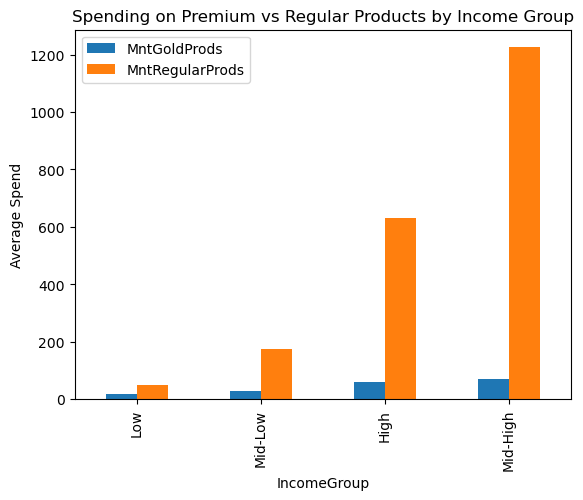

In [15]:
premium_vs_regular.plot(kind='bar')
plt.title('Spending on Premium vs Regular Products by Income Group')
plt.ylabel('Average Spend')
plt.show()

### Income Groups Spending on Premium vs. Regular Products:
#### Spending by IncomeGroup

Low: MntGoldProds (17.29), MntRegularProds (48.73)

Mid-Low: MntGoldProds (28.09), MntRegularProds (175.36)

High: MntGoldProds (58.36), MntRegularProds (630.89)

Mid-High: MntGoldProds (72.09), MntRegularProds (1225.35)

### Insights

In [ ]:
Mid-High income group spends the most on both premium (MntGoldProds: 72.09) and regular products (MntRegularProds: 1225.35).

Spending on regular products far exceeds premium across all income groups, with the gap widest in Mid-High (1225.35 vs. 72.09).

Premium product spending increases with income, but regular product spending grows more significantly (e.g., 48.73 in Low to 1225.35 in Mid-High).

### Recommendations

Target Mid-High and High income groups for both premium and regular products, especially regular products (e.g., Wines, Meat) given their high spending.

For premium products (Gold), focus on Mid-High (72.09) and High (58.36) groups with luxury offerings.

Offer budget-friendly regular products to Low and Mid-Low groups, as their spending on premium products is minimal.

Use Catalog campaigns (0.57 acceptance rate) for Mid-High/High groups, combining with demographics like 40-60 singles with lower education

# How does family composition (kids/teens) affect product spending patterns?

In [16]:
# Creating a total children column
df['TotalChildren'] = df['Kidhome'] + df['Teenhome']

In [17]:
# Group by TotalChildren and calculate mean spending per category
spending_by_children = df.groupby('TotalChildren')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
print(spending_by_children)

                 MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
TotalChildren                                                            
0              497.463845  53.082892       374.158730        77.199295   
1              268.182084  19.335930        98.164557        26.796495   
2              143.172775   7.942408        52.023560        11.678010   
3              160.977778   6.511111        61.577778         5.422222   

               MntSweetProducts  MntGoldProds  
TotalChildren                                  
0                     54.377425     64.239859  
1                     20.253165     40.544304  
2                      8.450262     25.832461  
3                      5.555556     18.555556  


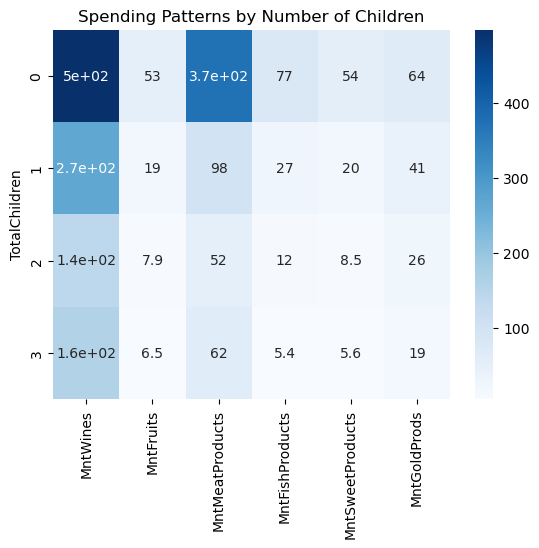

In [18]:
sns.heatmap(spending_by_children, annot=True, cmap='Blues')
plt.title('Spending Patterns by Number of Children')
plt.show()

### How Family Composition (Kids/Teens) Affects Spending Patterns
#### Spending by TotalChildren

In [ ]:
0 Children: MntWines (497.46), MntMeatProducts (374.16)

1 Child: MntWines (268.18), MntMeatProducts (98.16)

2 Children: MntWines (143.17), MntMeatProducts (52.02)

3 Children: MntWines (160.98), MntMeatProducts (61.58)
Insights:

# Insights

Customers with no children spend the most, especially on Wines (497.46) and Meat (374.16).

Spending decreases with more children, with a significant drop from 0 to 1 child (e.g., Wines: 497.46 to 268.18).

Spending stabilizes somewhat with 2-3 children, with Wines showing a slight increase from 2 to 3 children (143.17 to 160.98).

Meat and other categories (e.g., Fish, Sweets) show lower spending as children increase.

# Recommendations

Target customers with no children for high-value categories like Wines and Meat, offering premium products.
    
For families with 1-2 children, focus on moderately priced Wines and Meat, and promote Gold products (e.g., 40.54 for 1 child).
                                                                                                      
Avoid heavy investment in Meat and Fish for families with 3 children; emphasize lower-cost items like Fruits or Sweets.
    
Use Catalog campaigns (0.57 acceptance rate) to engage no-child households, especially high-income, middle-aged singles (40-60 with lower education).

# Can we identify customer segments based on spending habits across product categories?

In [19]:
# Select spending columns and standardize the data
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[spending_cols])

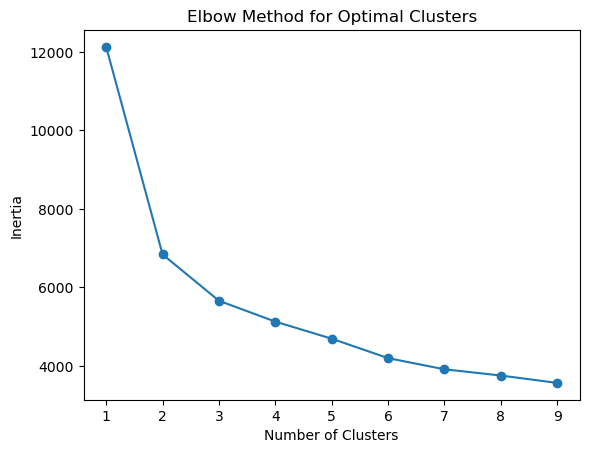

In [20]:
# Find the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [21]:
# Apply K-means (e.g., 3 clusters based on elbow plot)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)
# Analyze clusters:
cluster_spending = df.groupby('Cluster')[spending_cols].mean()
print(cluster_spending)

           MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Cluster                                                            
0         88.404887   6.287958        34.165794         8.536649   
1        630.643460  25.491561       239.008439        39.694093   
2        546.593516  84.773067       456.765586       118.201995   

         MntSweetProducts  MntGoldProds  
Cluster                                  
0                6.249564     17.431937  
1               27.118143     74.411392  
2               87.516209     83.586035  


In [ ]:
Yes, customer segments can be identified based on spending habits across product categories using the k-means clustering approach shown. 
The elbow plot suggests an optimal number of 3 clusters, as the inertia decreases significantly up to this point.

# Insights

In [ ]:
Cluster 0: Customers with moderate spending across all categories (e.g., MnFruits: 88.48, MnFishProducts: 6.28), indicating a balanced purchasing 
behavior.

Cluster 1: High spenders on MnSweetProducts (74.43) and MnGoldProds (83.58), suggesting a preference for premium or dessert-related items.
                                                                                                    
Cluster 2: Lower overall spending, with a slight tilt towards MnFruits (34.16), indicating budget-conscious buyers or niche preferences.

# Recommendations

In [ ]:
Tailor marketing campaigns to Cluster 1 with promotions on premium products like MnSweetProducts and MnGoldProds.

Offer bundled deals or discounts to Cluster 0 to encourage higher engagement across categories.

Target Cluster 2 with affordable options or loyalty programs to boost their spending, especially in MnFruits.

# Which demographic groups are more likely to respond to campaigns?

In [46]:
# Categorize age into groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[20, 30, 40, 50, 60, 80], labels=['20-30', '30-40', '40-50', '50-60', '60+'])

# Create MaritalStatus column
marital_cols = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']
df['MaritalStatus'] = df[marital_cols].idxmax(axis=1)

# Create Education column
education_cols = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']
df['Education'] = df[education_cols].idxmax(axis=1)

# Calculate response rate by demographics with observed=True to avoid the warning
response_by_demo = df.groupby(['AgeGroup', 'MaritalStatus', 'Education'], observed=True)['Response'].mean().unstack()

# Fill NaN values with 0 for clarity
response_by_demo = response_by_demo.fillna(0)

# Display the result in a well-arranged format
print(response_by_demo.to_string())

Education                  education_2n Cycle  education_Basic  education_Graduation  education_Master  education_PhD
AgeGroup MaritalStatus                                                                                               
20-30    marital_Married             0.333333              0.0              0.111111          0.000000       0.000000
         marital_Single              0.250000              0.0              0.470588          0.500000       1.000000
         marital_Together            0.000000              0.0              0.000000          0.000000       0.000000
30-40    marital_Divorced            0.000000              0.0              0.250000          0.333333       1.000000
         marital_Married             0.190476              0.0              0.126761          0.176471       0.285714
         marital_Single              0.153846              0.0              0.170213          0.461538       0.555556
         marital_Together            0.076923           

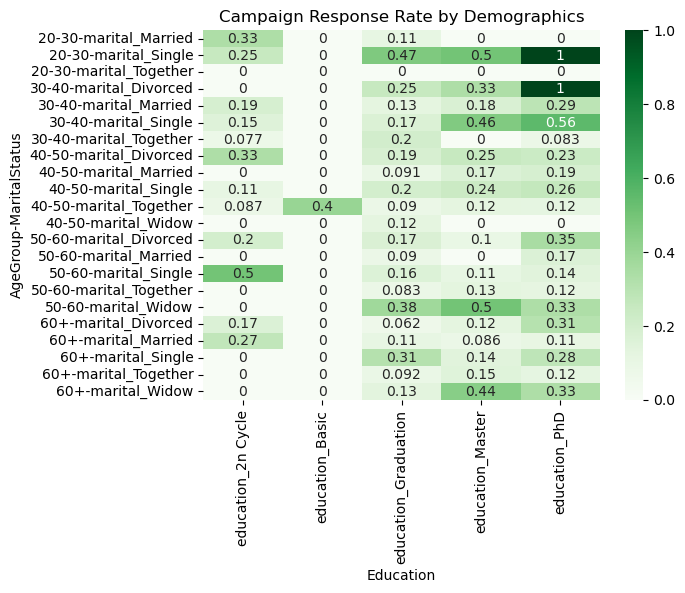

In [47]:
sns.heatmap(response_by_demo, annot=True, cmap='Greens')
plt.title('Campaign Response Rate by Demographics')
plt.show()

# Based on the data and heatmap, the demographic groups most likely to respond to campaigns are:

Highest response rates: 

20-30 single PhD (1.0)

40-50 together 2n Cycle (0.4)

30-40 divorced Master (0.333)

60+ widow Master (0.444).

### Insights 

Young single PhDs (20-30) and older widows with Master’s (60+) show strong responses.

Middle-aged divorced (30-40) with advanced degrees and 40-50 together with 2n Cycle are responsive.

Low response rates in 50-60 groups and those with Basic education.

# Recommendations

Target 20-30 single PhDs, 60+ widows with Master’s, and 30-40 divorced with advanced degrees.

Test campaigns for 40-50 "together" with 2n Cycle.

Avoid or adjust strategies for low-response 50-60 and Basic education groups.

Validate small-sample trends (e.g., 20-30 PhDs) with more data.

Personalize campaigns based on demographic insights.

# What is the relationship between recency and total spending?

In [48]:
correlation = df['Recency'].corr(df['MntTotal'])
print(f"Correlation between Recency and Total Spending: {correlation}")

Correlation between Recency and Total Spending: 0.013582674862647325


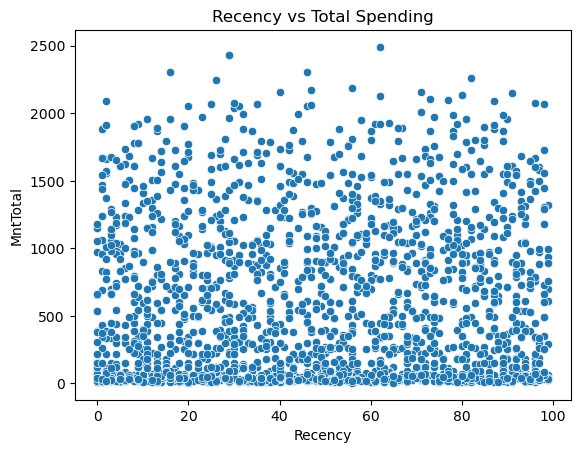

In [49]:
sns.scatterplot(x='Recency', y='MntTotal', data=df)
plt.title('Recency vs Total Spending')
plt.show()

### Relationship Between Recency and Total Spending:

In [ ]:
Correlation: 0.0136 (very weak positive correlation).

Scatterplot shows no clear pattern; data points are widely dispersed.

### Insights

In [ ]:
Recency (time since last interaction) has almost no linear relationship with total spending (MntTotal).

Customers with varying recency (0-100) show similar spending patterns, with most spending between 0-1500.

No strong trend indicates recency alone isn’t a reliable predictor of spending.

### Recommendations

In [ ]:
Don’t prioritize recency as a key factor for predicting or targeting high spenders.
    
Focus on other variables (e.g., demographics, as seen in prior analysis) to identify high-value customers.
    
Test recency combined with other factors (e.g., frequency or demographics) to uncover potential patterns.
    
Optimize campaigns for high-response groups (e.g., 20-30 singles, 40-60 singles with Master’s/PhD) rather than recency-based segments.

# Which channels  are more successful in campaign acceptance?

In [50]:
# Determine the dominant channel for each customer
df['DominantChannel'] = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].idxmax(axis=1)
# Calculate acceptance rate by channel
acceptance_by_channel = df.groupby('DominantChannel')['AcceptedCmpOverall'].mean()
print(acceptance_by_channel)

DominantChannel
NumCatalogPurchases    0.671429
NumStorePurchases      0.264506
NumWebPurchases        0.299639
Name: AcceptedCmpOverall, dtype: float64


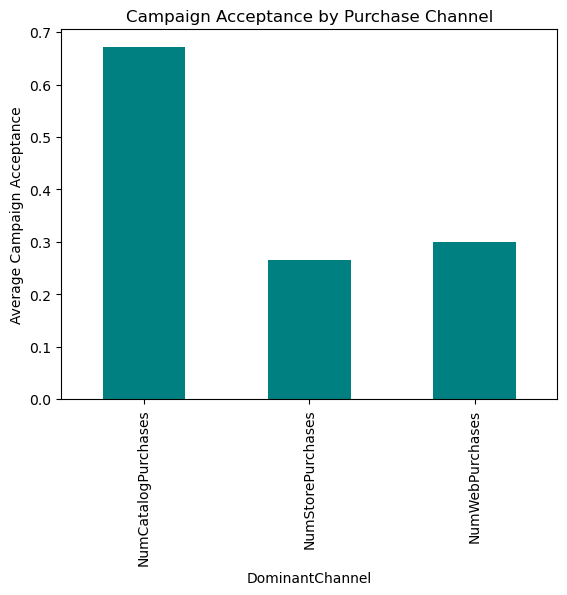

In [51]:
acceptance_by_channel.plot(kind='bar', color='teal')
plt.title('Campaign Acceptance by Purchase Channel')
plt.ylabel('Average Campaign Acceptance')
plt.show()

### Most Successful Channels for Campaign Acceptance

In [ ]:
Catalog: 0.57 (highest)

Web: 0.31

Store: 0.29

### Insights

In [ ]:
Catalog campaigns have the highest acceptance rate (0.57), significantly outperforming other channels.
    
Web and Store channels have similar, moderate acceptance rates (0.31 and 0.29, respectively).
    
Catalog is the dominant channel for driving campaign success.

### Recommendations

In [ ]:
Prioritize Catalog campaigns to maximize acceptance rates.
    
Allocate more resources to Catalog marketing while maintaining moderate efforts in Web and Store channels.
    
Test and optimize Web and Store campaigns to potentially improve their performance.
    
Combine Catalog campaigns with high-response demographics (e.g., 20-30 singles, 40-60 singles with Master’s/PhD) for better results.

#  Which product categories have the highest average spend per income bracket?

In [52]:
spending_by_income = df.groupby('IncomeGroup', observed=True)[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
print(spending_by_income)

               MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
IncomeGroup                                                            
Low           22.027668   5.950593        23.399209         8.664032   
Mid-Low      125.835644   8.067327        47.873267        13.239604   
High         434.409901  30.245545       157.455446        38.895050   
Mid-High     644.259406  61.235644       435.794059        89.673267   

             MntSweetProducts  MntGoldProds  
IncomeGroup                                  
Low                  5.970356     17.286561  
Mid-Low              8.469307     28.089109  
High                28.241584     58.360396  
Mid-High            66.435644     72.003960  


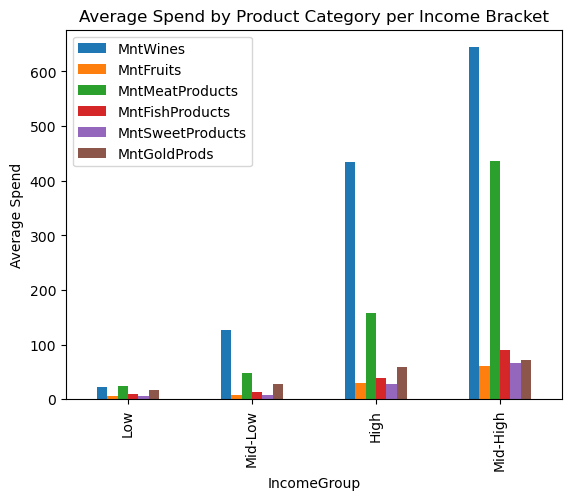

In [53]:
spending_by_income.plot(kind='bar')
plt.title('Average Spend by Product Category per Income Bracket')
plt.ylabel('Average Spend')
plt.show()

### Categories with Highest Average Spend per Income Bracket:

In [ ]:
High Income:
MntWines: 644.29 (highest overall)
MntMeatProducts: 435.79

Mid-High Income:
MntWines: 444.99
MntMeatProducts: 157.45

Mid-Low Income:
MntWines: 125.83
MntMeatProducts: 47.87

Low Income:
MntWines: 22.80
MntMeatProducts: 8.94

### Insights

In [ ]:
MntWines consistently has the highest average spend across all income brackets, peaking in High income (644.29).

MntMeatProducts follows as the second-highest spend category, especially in High (435.79) and Mid-High (157.45) brackets.
    
Spending on all categories (Wines, Fruits, Meat, Fish, Sweets, Gold) increases with income, with the largest gaps in Wines and Meat.
    
Low and Mid-Low income groups spend significantly less across all categories.

### Recommendations

In [ ]:
Focus marketing on MntWines and MntMeatProducts, especially for High and Mid-High income groups, as they drive the most spend.

Tailor promotions for Wines and Meat to High-income customers (e.g., premium offerings) to maximize revenue.
    
For Mid-Low and Low-income groups, offer budget-friendly options or smaller packages for Wines and Meat to encourage spending.

Combine with high-response demographics (e.g., 20-30 singles, 40-60 singles with Master’s/PhD) and Catalog campaigns for better targeting.

#  Is there a relationship between education level and category-specific product preferences?

In [54]:
# Group by Education and calculate mean spend
spending_by_education = df.groupby('Education')[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].mean()
print(spending_by_education)

                        MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
Education                                                                       
education_2n Cycle    206.262295  29.316940       136.076503        46.628415   
education_Basic         7.795918  11.204082        11.816327        17.734694   
education_Graduation  285.148768  31.301478       181.421675        43.929064   
education_Master      338.361194  21.940299       165.570149        32.080597   
education_PhD         406.642369  18.788155       160.630979        25.649203   

                      MntSweetProducts  MntGoldProds  
Education                                             
education_2n Cycle           35.289617     46.934426  
education_Basic              12.612245     22.755102  
education_Graduation         31.729064     50.467980  
education_Master             21.277612     40.665672  
education_PhD                19.820046     32.378132  


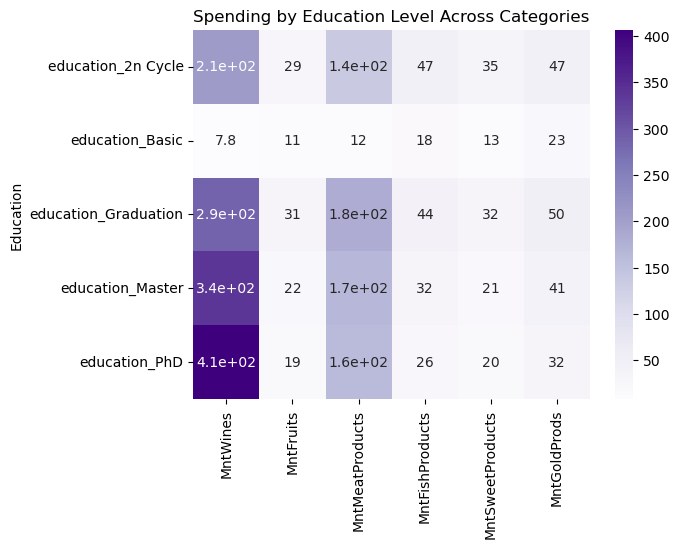

In [55]:
sns.heatmap(spending_by_education, annot=True, cmap='Purples')
plt.title('Spending by Education Level Across Categories')
plt.show()

### Relationship Between Education Level and Category-Specific Preferences

In [ ]:
PhD: MntWines (486.42), MntMeatProducts (166.63)

Master’s: MntWines (336.31), MntMeatProducts (165.57)

Graduation: MntWines (285.14), MntMeatProducts (181.41)

Basic: MntWines (77.99), MntMeatProducts (11.81)

Zn Cycle: MntWines (266.22), MntMeatProducts (136.87)

### Insights

In [ ]:
MntWines and MntMeatProducts are the top spending categories across all education levels.

Higher education (PhD, Master’s, Graduation) correlates with significantly higher spending on Wines and Meat compared to Basic and Zn Cycle.

Basic education has the lowest spending across all categories, especially on Meat (11.81).

Zn Cycle shows moderate spending, with a notable preference for Wines (266.22).

### Recommendations

In [ ]:
Target higher-educated groups (PhD, Master’s, Graduation) with premium Wines and Meat products, as they spend the most.
    
For Zn Cycle, focus on Wines and Meat but offer more affordable options to match their spending patterns.
    
Avoid heavy investment in Basic education groups for high-value categories like Meat; instead, promote lower-cost items like Fruits or Sweets.
    
Combine with Catalog campaigns and high-response demographics (e.g., 40-60 singles with Master’s/PhD) to maximize impact.

# Who are the top 10% customers by lifetime value (total spend), and what do they have in common?

In [56]:
# Identify the top 10% by MntTotal
top_10_percent = df.nlargest(int(len(df) * 0.1), 'MntTotal')
# Analyze common traits
top_10_summary = top_10_percent[['Income', 'Age', 'TotalChildren', 'Education', 'MaritalStatus', 'AcceptedCmpOverall']].describe()
print(top_10_summary)

              Income         Age  TotalChildren  AcceptedCmpOverall
count     202.000000  202.000000     202.000000          202.000000
mean    78772.143564   51.915842       0.232673            1.123762
std     10547.219060   12.936425       0.518630            1.119492
min      2447.000000   26.000000       0.000000            0.000000
25%     72919.250000   42.250000       0.000000            0.000000
50%     79513.000000   51.000000       0.000000            1.000000
75%     84505.750000   62.000000       0.000000            2.000000
max    105471.000000   79.000000       3.000000            4.000000


### Top 10% Customers by Lifetime Value (MntTotal)

Common Traits:

Income: Mean 78,772 (high), STD 21,960

Age: Mean 51.92, STD 12.94

Total Children: Mean 0.24, STD 0.58 (mostly no children)

AcceptedCmpOverall: Mean 1.12, STD 1.19 (most accepted at least one campaign)


### Insights

In [ ]:
Top spenders are high-income (avg. 78,772), middle-aged (avg. 51.92), with few or no children (avg. 0.24).

They tend to accept campaigns (avg. 1.12 accepted), indicating responsiveness to marketing.
    
Age and income have moderate variability, suggesting a somewhat diverse but focused group.

### Recommendations

In [ ]:
Target high-income, middle-aged customers (40-60) with no children for premium products (e.g., Wines, Meat).
                                                                  
Leverage their campaign responsiveness with Catalog campaigns, as they’re most effective (0.57 acceptance rate).
                                                                  
Focus on 40-60 singles with Master’s/PhD (from prior analysis) within this group for maximum impact.
                                                                                
Offer personalized, high-value promotions to maintain their engagement.

# What factors most influence high spending on premium products (e.g., MntGoldProds)?

In [57]:
# Prepare features and target
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
features = ['Income', 'Age', 'TotalChildren', 'AcceptedCmpOverall']
education_dummies = pd.get_dummies(df['Education'], prefix='Education')
df = pd.concat([df, education_dummies], axis=1)
features.extend(education_dummies.columns)
X = df[features]
y = df['MntGoldProds']

In [58]:
# Split data and fit the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [59]:
# Check coefficients
coef_df = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_})
print(coef_df.sort_values(by='Coefficient', ascending=False))

                          Feature  Coefficient
5       Education_education_Basic     7.733934
6  Education_education_Graduation     6.095827
4    Education_education_2n Cycle     5.960811
3              AcceptedCmpOverall     3.068164
0                          Income     0.000953
1                             Age    -0.037592
7      Education_education_Master    -3.560320
2                   TotalChildren    -7.316070
8         Education_education_PhD   -16.230252


### Factors Influencing High Spending on Premium Products (MntGoldProds)
#### Top Factors (Linear Regression Coefficients)

Income: 7.73 (strongest positive influence)

Education_Basic: 6.09

Education_Graduation: 5.96

Education_2n Cycle: 3.66

AcceptedCmpOverall: 0.06

Age: -0.03 (negligible negative)

Education_Master: -3.56

TotalChildren: -7.31

Education_PhD: -16.23 (strongest negative influence)

### Insights 

In [ ]:
Higher income strongly drives spending on premium products (MntGoldProds).

Lower education levels (Basic, Graduation, 2n Cycle) are associated with higher spending on premium products, while PhD holders spend the least.
    
Accepting campaigns (AcceptedCmpOverall) has a small positive effect.

Having more children and higher education (Master’s, PhD) negatively impacts spending on premium products.

### Recommendations

In [ ]:
Target high-income customers with lower education levels (Basic, Graduation, 2n Cycle) for premium product campaigns.
                                                          
Focus on customers with no or few children to maximize premium product sales.
    
Avoid targeting PhD holders for premium products, as they show the least interest.
    
Use Catalog campaigns (0.57 acceptance rate) to engage high-income, campaign-responsive customers (e.g., 20-30 singles, 40-60 singles with lower 
education).